In [3]:
import pandas as pd
#Import datasets
train_data = pd.read_csv('train.csv',index_col = 'PassengerId')
test_data = pd.read_csv('test.csv',index_col = 'PassengerId')
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

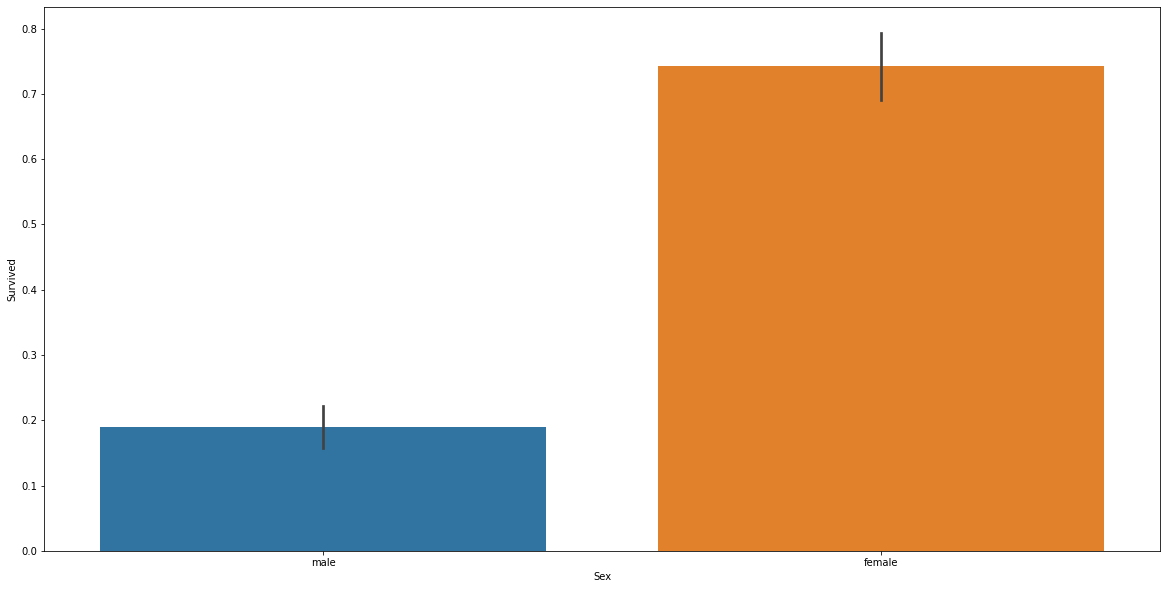

In [4]:
#exploring Sex-Surviving dependence
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.barplot(x = train_data['Sex'],y=train_data['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

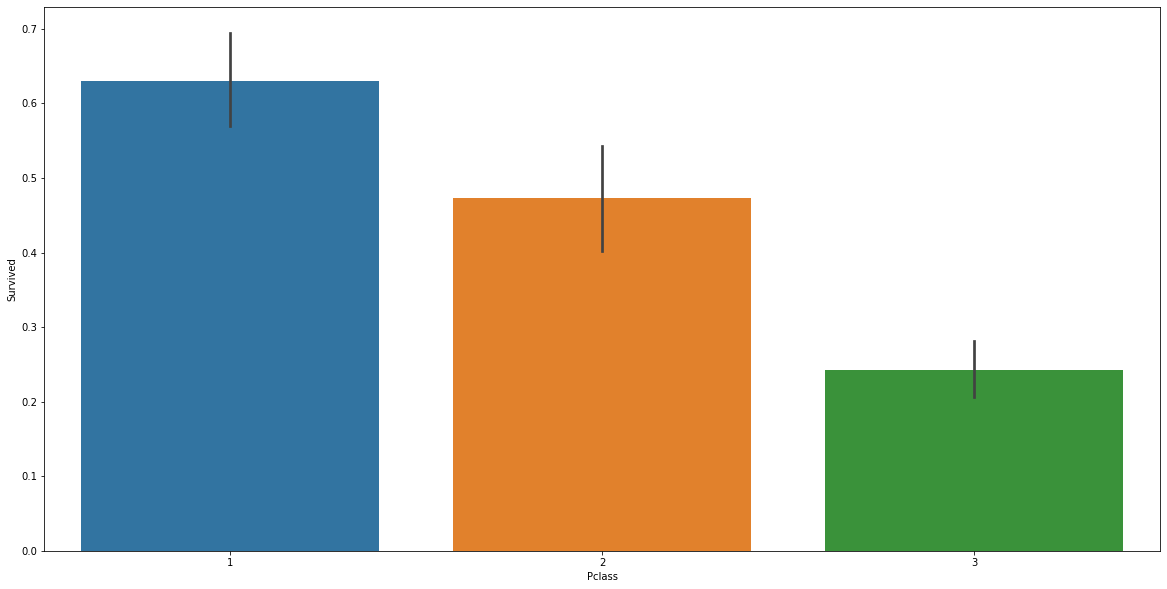

In [5]:
#exploring Class-Surviving dependence
plt.figure(figsize=(20,10))
sns.barplot(x = train_data['Pclass'],y=train_data['Survived'])

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

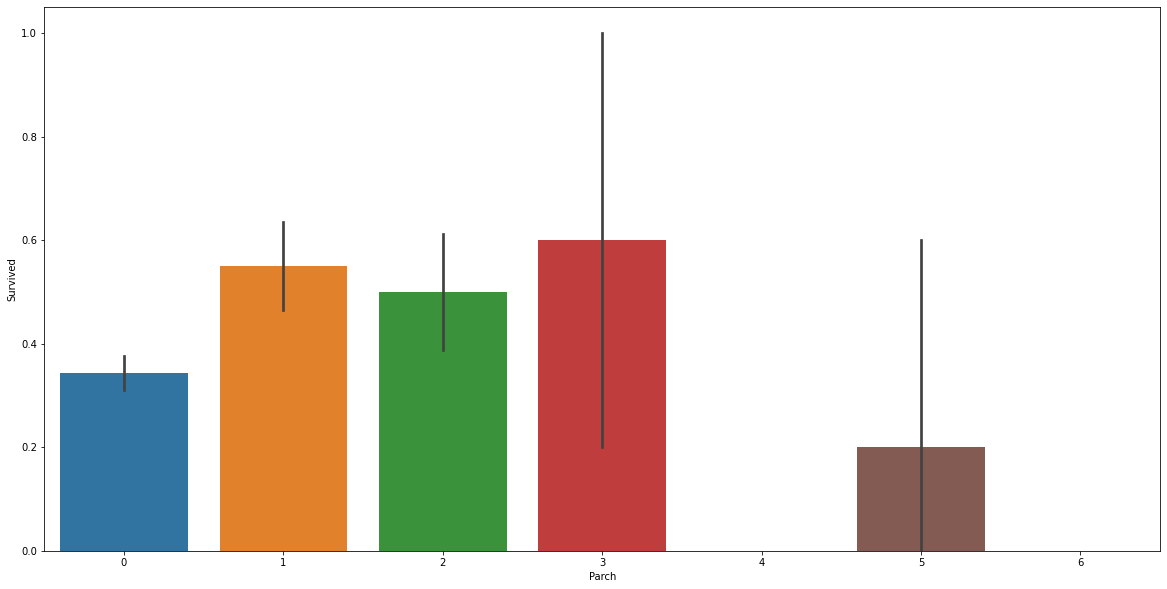

In [6]:
#exploring Parch-Surviving dependence
plt.figure(figsize=(20,10))
sns.barplot(x = train_data['Parch'],y=train_data['Survived'])

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

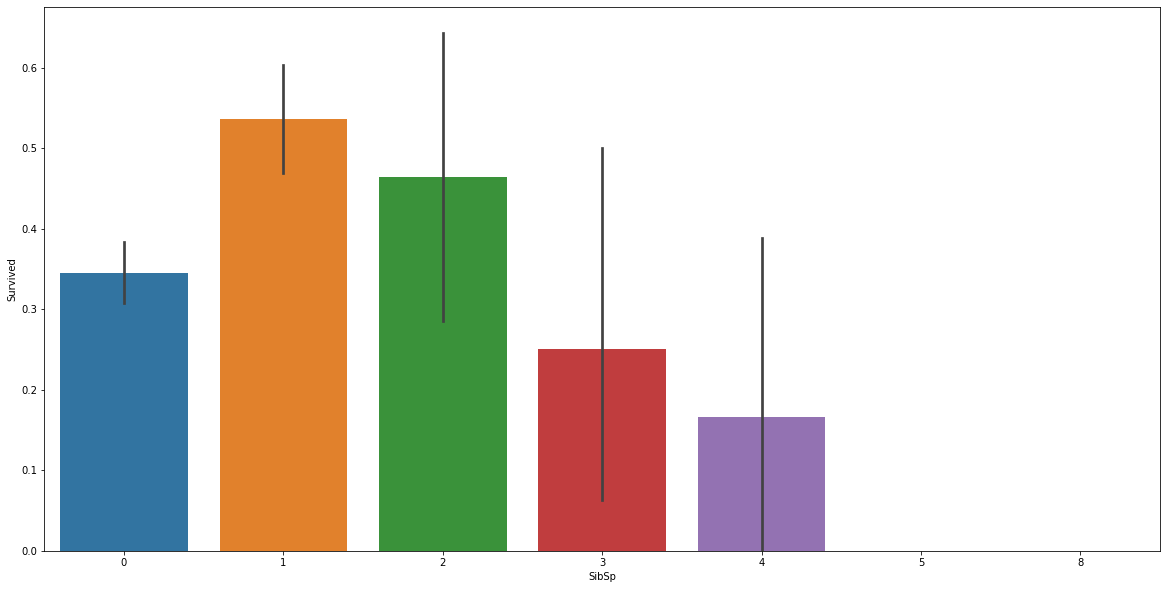

In [7]:
#exploring Parch-Surviving dependence
plt.figure(figsize=(20,10))
sns.barplot(x = train_data['SibSp'],y=train_data['Survived'])

In [22]:
relatives = train_data["SibSp"]+train_data["Parch"]
train_data['Relatives'] = relatives


<AxesSubplot:xlabel='Relatives', ylabel='Survived'>

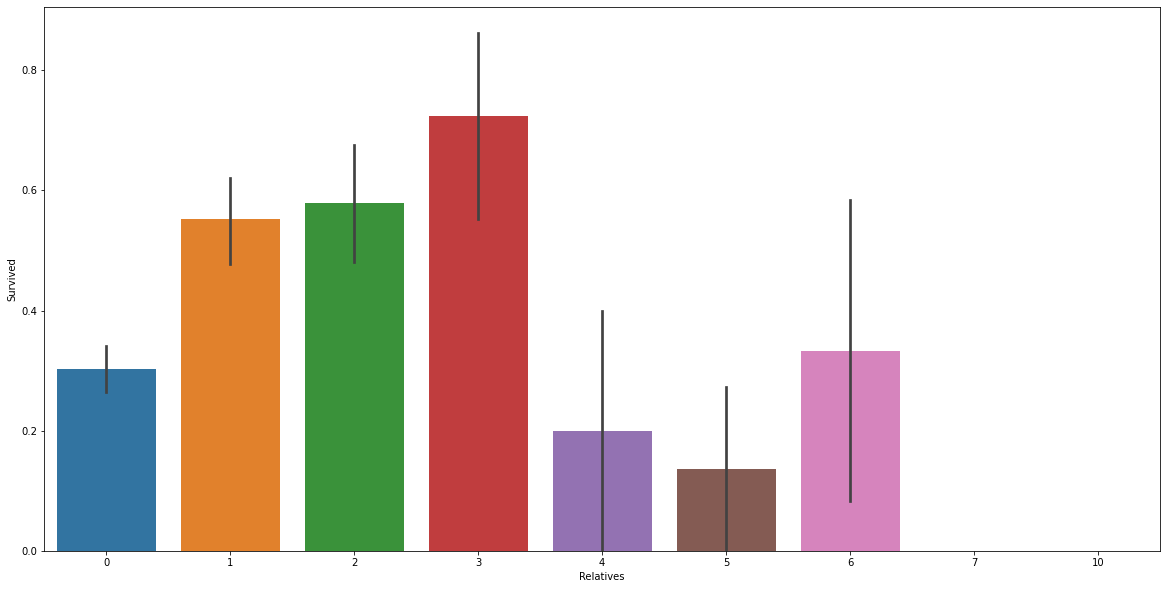

In [24]:
#exploring Relatives-Surviving dependence
plt.figure(figsize=(20,10))
sns.barplot(x = train_data['Relatives'],y=train_data['Survived'])

In [53]:
train_data = train_data.dropna(axis = 0)

In [92]:
y = train_data.Survived
features = ['Sex','Pclass']
X = train_data[features]
sex = {'male': 1,'female': 2}
X.Sex = [sex[item] for item in X.Sex]
# na_value = X['Age'].median()
# X['Age'] = X['Age'].fillna(na_value)


D:\Python\IDE\Anaconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


In [94]:
train_X,val_X,train_y,val_y = train_test_split(X,y,random_state = 1)
model = RandomForestRegressor(random_state = 1)
model.fit(train_X,train_y)
val_preds = model.predict(val_X)
print(mean_absolute_error(val_y,val_preds))

0.302096224434421


In [95]:
train_X,val_X,train_y,val_y = train_test_split(X,y,random_state = 1)
model = DecisionTreeRegressor(random_state = 1)
model.fit(train_X,train_y)
val_preds = model.predict(val_X)
print(mean_absolute_error(val_y,val_preds))

0.3040203004664944


In [100]:
t_relatives = test_data["SibSp"]+test_data["Parch"]
test_data['Relatives'] = t_relatives
full_model = RandomForestRegressor(random_state = 1)
full_model.fit(train_X,train_y)
test_X = test_data[features]
sex = {'male': 1,'female': 2}
test_X.Sex = [sex[item] for item in test_X.Sex]
# na_value = test_X['Age'].median()
# test_X['Age'] = test_X['Age'].fillna(na_value)
# test_X.describe()

D:\Python\IDE\Anaconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [101]:
test_preds = full_model.predict(test_X)
test_preds = [int(i + (0.5 if i > 0 else -0.5)) for i in test_preds]
print(test_preds)

[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 

In [102]:
output = pd.DataFrame({'PassengerId': test_data.index,
                      'Survived': test_preds})
output.to_csv('submission.csv', index=False)